In [ ]:
import pandas as pd
import datetime as datetime 

In [ ]:
#col_names = ["Message ID", "Channel", "Interaction", "Bot ID",
#             "Bot name","User","Direction","Message","Extracted Data",
#             "Archive","Date","Browser","Is Mobile","OS","Country"]
#interaction = pd.read_csv('dadosChatbotJuju23.csv',sep=';',engine= 'python',parse_dates=['Date'])


col_names = ["Message ID", "Channel", "Interaction", "Bot ID",
             "Bot name","User","Direction","Message","Extracted Data",
             "Archive","Date","Browser","Is Mobile","OS","Country"]
interaction = pd.read_csv('/content/drive/MyDrive/Chat bot Juju/dadosChatbotJuju.csv',sep=";",encoding="ISO-8859-1")


Distinct Usuários

In [ ]:
dtF = pd.DataFrame(interaction,columns=col_names)
dfteste = interaction.loc[ :, 'User'::5]
dfDistinct = dfteste.drop_duplicates(['User'])

In [ ]:
dfDistinct

,User,Date
0,guest9a4369f139946418a7ec8f82b131488362592d793...,2019-08-12 09:33:00
35,guest5911a463fe765a1ec177d3b2a346841781453de5f...,2019-08-12 10:57:06
36,guesta973ea77f960685b9968bfd2f62958852beda8bce...,2019-08-12 10:58:03
40,guest3a17b2beedf8391e347ca72e78fe1c9c5e40c352d...,2019-08-12 11:00:53
47,guest16851c5b35cef024c9cef7e8f89a844260d2c6112...,2019-08-12 11:01:55
...,...,...
248416,guest4076968ca246ce6c38b0cb0a5ca75fd6d8fd86416...,2020-12-07 11:13:09
248429,guest6393bdad07c5a5e341845f0747b485fdf65ce29c7...,2020-12-07 12:51:43
248485,guest308f82f98a246ebd4446bdaaf4a74552d512f6112...,2020-12-07 15:02:36
248493,guest6c5194bf28918e7761f0efad49dfd5edc74b6a25e...,2020-12-07 15:29:17


In [ ]:
#baseMes = dfDistinct.Date.astype(str)
AcessosMes = pd.to_datetime(dfDistinct.Date.str.replace('/','-')).dt.strftime('%Y-%m')#baseMes.str.slice(start=3, stop=10, step=1)
AcessosAno = pd.to_datetime(dfDistinct.Date.str.replace('/','-')).dt.strftime('%Y')# vou ter que remover < 08/2019

#AcessosAno = pd.to_datetime(baseMes.str.slice(start=3, stop=11, step=1),format="%m/%Y")
#AcessosMes = pd.to_datetime(baseMes.str.slice(start=3, stop=11, step=1),format="%m/%Y")



In [ ]:
#a = AcessosMes.convert_dtypes()

In [ ]:
#AcessosMes.min()

In [ ]:
DFDatesMes = pd.DataFrame(AcessosMes.sort_values())
DFDatesAno = pd.DataFrame(AcessosAno.sort_values())


In [ ]:
#Removendos dados referente a testes
dfnot = DFDatesMes.loc[(DFDatesMes.Date < "2019-08")]
DFDatesMes = DFDatesMes.drop(dfnot.index)


In [ ]:
#DFDatesMes

Media de Acesso por Mês Agosto 2019 a dezembro 2020

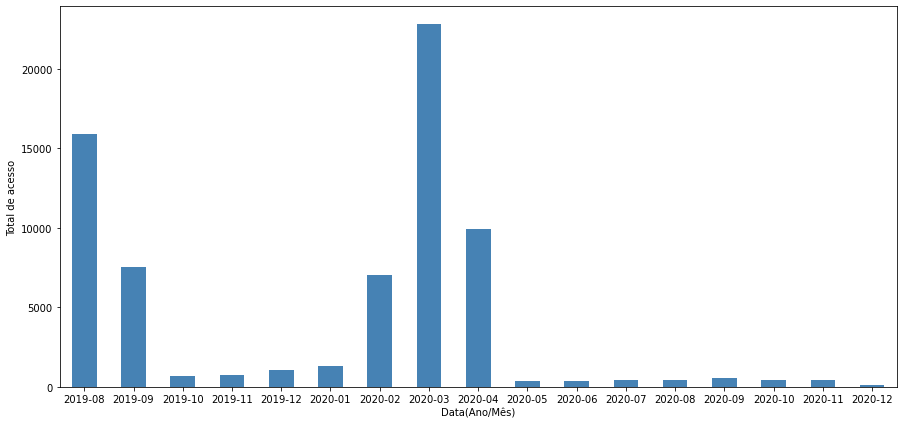

In [ ]:
fig1 = DFDatesMes.groupby(["Date"]).Date.count().plot(kind='bar',label='Acesso',color = 'steelblue',figsize=(15,7),xlabel="Data(Ano/Mês)", ylabel="Total de acesso")#[-5].plot(kind='bar')
fig1.xaxis.set_tick_params(rotation=360)
fig1.figure.savefig('numAcessoMes.png')

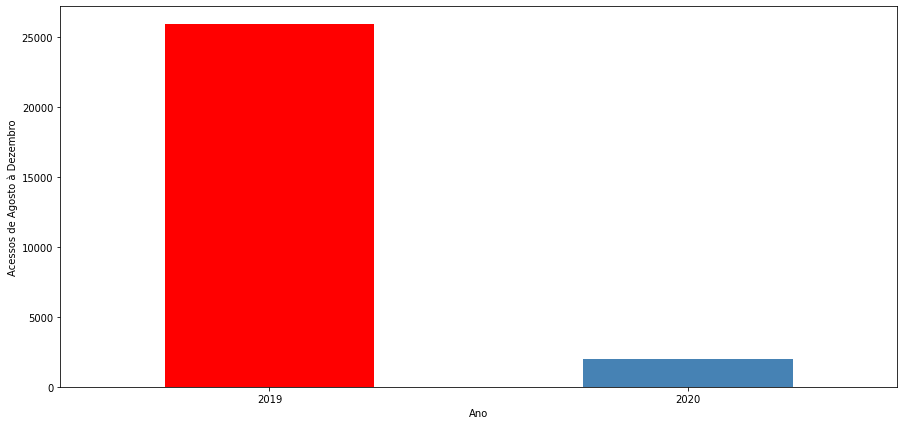

In [ ]:
filtroAno = DFDatesMes[((DFDatesMes.Date  >= "2019-08") & (DFDatesMes.Date  < "2020-01")) | (DFDatesMes.Date  >= "2020-08")]
filtroAno = pd.DataFrame(filtroAno)
filtroAno2 = filtroAno.Date.str.slice(start=0, stop=4, step=1)
filtroAno2 = pd.DataFrame(filtroAno2)
#filtroAno2 
color = ['red','steelblue']
fig2 = filtroAno2.groupby(["Date"]).Date.count().plot(kind='bar',label='Acesso',color=color,figsize=(15,7),xlabel="Ano", ylabel="Acessos de Agosto à Dezembro")
fig2.xaxis.set_tick_params(rotation=360)
fig2.figure.savefig('numAcessoAgosto.png') 

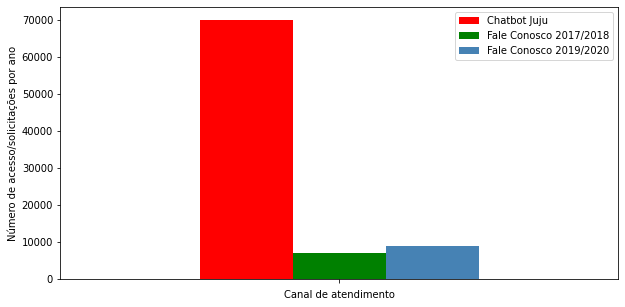

In [ ]:
#filtroAnotodo = DFDatesMes[DFDatesMes.Date  >= "2019-08"]
filtroAnotodo = pd.DataFrame(AcessosAno)
filtroAnotodo2 = filtroAnotodo.Date.str.slice(start=0, stop=4, step=1)
filtroAnotodo2 = pd.DataFrame(filtroAnotodo2)

saida2 = int(filtroAnotodo2.count())
a2 = saida2
vetValor2 = {'Chatbot Juju':[a2],'Fale Conosco 2017/2018':[6879],'Fale Conosco 2019/2020':[8906]}
df2 = pd.DataFrame(data=vetValor2,index=[''])
color = ['red','green','steelblue']
plotmaroto2 = df2.plot(kind='bar',color=color,figsize=(10,5),xlabel="Canal de atendimento", ylabel="Número de acesso/solicitações por ano")#.axes.get_xaxis().set_visible(False)
plotmaroto2.xaxis.set_tick_params(rotation=360)

In [ ]:
plotmaroto2.figure.savefig('todos.png')

In [ ]:
dfs = dfteste.groupby(['User','Date']).User.count() + 1
#print(dfs)

ACESSO DO ANO DE Agosto de 2019 a dezembro

In [ ]:
#dfnot3 = DFDatesMes.loc[(DFDatesMes.Date > '2019-12')]
#DFDatesMes3 = DFDatesMes.drop(dfnot3.index)
#AcessosAno3 = AcessosMes.str.slice(start=0, stop=4, step=1)# vou ter que remover < 08/2019
#DFDatesMes3 = DFDatesMes3.Date.str.slice(start=0, stop=4, step=1)
#DFDatesAno3 = pd.DataFrame(DFDatesMes3)
#ax = DFDatesAno2.groupby(["Date"]).Date.count().plot(kind='barh',color='red',legend=True)
#DFDatesAno3.groupby(["Date"]).Date.count().plot(kind='barh',legend=True).legend(labels=["2020 - 1663 acessos","2019 - 1584 acessos"], title = "Nº de Acessos").axes.get_yaxis().set_visible(False)
#DFDatesAno.groupby(["Date"]).Date.count().plot(kind='barh',label='Acesso',ax=ax) 
#DFDatesAno3.count()

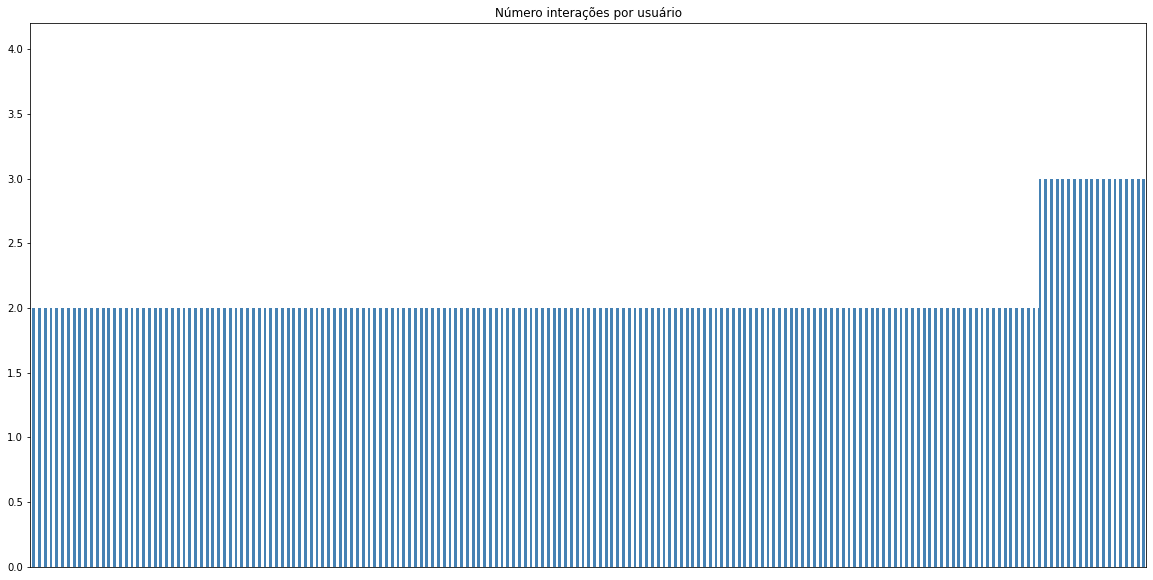

In [ ]:
dfs = dfteste.groupby(['User','Date']).User.count() + 1
dfs2 = dfs.sort_values()
fig3 = dfs2.plot(kind='bar',title='Número interações por usuário',color = 'steelblue',figsize=(20,10)).axes.get_xaxis().set_visible(False)



In [ ]:
dfs = dfteste.groupby(['User','Date']).User.count() + 1
dfs2 = dfs.sort_values()
fig3 = dfs2.plot(kind='bar',color = 'steelblue',figsize=(20,10),xlabel="Usuário", ylabel="Interações com o chatbot")

In [ ]:
dfs = dfteste.groupby(['User','Date']).User.count() + 1
dfs.max()
dfs.min()


In [ ]:

fig3.figure.savefig('numInteracoes.png')

In [ ]:
dfc = (dfteste.groupby(['User','Date']).User.count()+1).reset_index(name="Time")


In [ ]:
vetNum = []
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0
cont10 = 0
cont11 = 0
cont12 = 0
cont13 = 0
cont14 = 0
cont15 = 0
cont16 = 0
cont17 = 0
cont18 = 0


for i in dfc.Time:
  if(i==1):
    cont1 += 1
  if(i==2):
    cont2 += 1
  if(i==3):
    cont3 += 1   
  if(i==4):
    cont4 += 1
  if(i==5):
    cont5 += 1
  if(i==6):
    cont6 += 1
  if(i==7):
    cont7 += 1
  if(i==8):
    cont8 += 1
  if(i==9):
    cont9 += 1
  if(i==10):
    cont10 += 1
  if(i==11):
    cont11 += 1
  if(i==12):
    cont12 += 1
  if(i==13):
    cont13 += 1
  if(i==14):
    cont14 += 1
  if(i==15):
    cont15 += 1
  if(i==16):
    cont16 += 1
  if(i==17):
    cont17 += 1
  if(i==18):
    cont18 += 1    
                                   

In [ ]:
print(cont1,cont2,cont3, 
cont4 ,
cont5 ,
cont6,
cont7 ,
cont8 ,
cont9 ,
cont10,
cont11 ,
cont12 ,
cont13,
cont14 ,
cont15 ,
cont16,
cont17,
cont18 )


In [ ]:
vetinter = [  
cont3, 
cont4 ,
cont5 ,
cont6 ,
 cont7 ,
cont8 ,
cont9 ,
cont10,
cont11 ,
cont12 ,
cont13,
cont14 ,
cont15 ,
cont16,
cont17,
cont18]

a = [0, 5917, 5441, 3945, 3198, 1826, 1178, 654, 432, 214, 100, 53, 23, 6, 4, 2, 2,2]
b = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
#pd.DataFrame(lst, columns = ['Name'])

dfInteraa = pd.DataFrame(data=a,columns=[''])
dfInterab = pd.DataFrame(data=b,columns=[''])

In [ ]:
vetinter = {
'3 interações': cont3, 
'4 interações': cont4 ,
'5 interações': cont5 ,
'6 interações': cont6 ,
'7 interações': cont7 ,
'8 interações': cont8 ,
'9 interações': cont9 ,
'10 interações': cont10,
'11 interações': cont11 ,
'12 interações': cont12 ,
'13 interações': cont13,
'14 interações': cont14 ,
'15 interações': cont15 ,
'16 interações': cont16,
'17 interações': cont17,
'18 interações': cont18}

dfIntera = pd.DataFrame(data=vetinter,index=[''])

In [ ]:
#color = ['red','green','steelblue']
#plotmaroto = dfIntera.plot(kind='bar',figsize=(10,6), xlabel="Quantidade de interações por usuários", ylabel=" Eixo y")#.axes.get_xaxis().set_visible(False)
#plotmaroto.axes.get_xaxis().set_visible(False)
#plotmaroto.figure.savefig('numInteracoesporcores.png')

In [ ]:
#color = ['red','green','steelblue']
#plotmaroto = dfIntera.plot(kind='bar',title='Quantidade de interações',figsize=(10,5))#.axes.get_xaxis().set_visible(False)
#plotmaroto.figure.savefig('numInteracoesporcores.png')

In [ ]:
h = dfteste.drop_duplicates(['User'])

In [ ]:
usuario = dfc.groupby(['User','Date']).User.count()

In [ ]:
usuario.count()

In [ ]:
a = DFDatesMes[(DFDatesMes.Date  <= "2020-12") & (DFDatesMes.Date  >= "2020-08")]

In [ ]:
a.count()


Covid


In [ ]:
filtrocovid  = DFDatesMes[DFDatesMes.Date  >= "2020-04"]
filtrocovid = pd.DataFrame(filtrocovid)
filtrocovid2  = filtrocovid .Date.str.slice(start=0, stop=4, step=1)
filtrocovid2  = pd.DataFrame(filtrocovid2)

saida3 = int(filtrocovid2.count())
a3 = saida3
vetValor3 = {'Chatbot Juju 2019/2020':[a3],'Fale Conosco 2019':[5512],'Fale Conosco 2020':[5713]}
df3 = pd.DataFrame(data=vetValor3,index=[''])
color = ['red','green','steelblue']
plotmaroto3 = df3.plot(kind='bar',color=color,figsize=(10,5),xlabel="Canal de atendimimento", ylabel="Número Acesso por ano")#.axes.get_xaxis().set_visible(False)


In [ ]:
plotmaroto3.figure.savefig('todosAcessoCovid.png')

In [ ]:
import matplotlib.pyplot as plt
grupos = ['3',
'4',
'5',
'6',
'7',
'8',
'9',
'10',
'11',
'12',
'13',
'14',
'15',
'16',
'17',
'18']
valores = [5917, 5441, 3945, 3198, 1826, 1178, 654, 432, 214, 100, 53, 23, 6, 4, 2, 2]

plt.bar(grupos,valores)
plt.ylabel('Quantidade de interações')
plt.xlabel('Interações por usuários')
plt.savefig('numInteracoesporcores.png')
plt.show()